<a href="https://colab.research.google.com/github/amirhoseinRj/Digikala-Data-Cup/blob/master/color_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
qepip install fastai --upgrade

     |████████████████████████████████| 358kB 5.6MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from fastai.vision.all import *
from fastai import *

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'digi_sale/'

Mounted at /content/gdrive


In [ ]:
path = r'/content/gdrive/My Drive/digikala sales prediction/color recognizer/train'

In [ ]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, bs = 128)

In [ ]:
from fastai.vision import *

In [ ]:
learn = cnn_learner(dls, models.resnet34, loss_func=CrossEntropyLossFlat(), config=cnn_config(ps=0.25))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.004365158267319202)

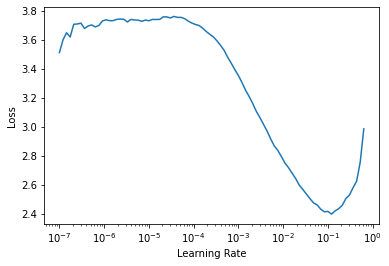

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4, 3e-3)

epoch,train_loss,valid_loss,time
0,1.825055,0.992985,02:28


epoch,train_loss,valid_loss,time
0,0.794174,0.853011,00:30
1,0.515613,0.824736,00:29
2,0.308004,0.734699,00:29
3,0.166374,0.742073,00:29


In [ ]:
learn.predict('/content/gdrive/My Drive/digikala sales prediction/color recognizer/test/1000000004.jpg')

('brown',
 tensor(2),
 tensor([5.6373e-06, 5.2695e-09, 9.9983e-01, 1.4151e-07, 1.9820e-06, 1.2094e-07,
         8.6623e-05, 1.2697e-05, 9.8962e-06, 5.6200e-05, 5.2496e-08, 1.7832e-07]))

In [ ]:
color_predictions = pd.DataFrame( columns= ['file_name','color_id'])

In [ ]:
def color_coder(color):
  if color == 'pink':
    return 1
  elif color == 'purple':
    return 2
  elif color == 'yellow':
    return 3  
  elif color == 'orange':
    return 4  
  elif color == 'white':
    return 5  
  elif color == 'silver':
    return 6  
  elif color == 'grey':
    return 7  
  elif color == 'black':
    return 8  
  elif color == 'red':
    return 9 
  elif color == 'brown':
    return 10  
  elif color == 'green':
    return 11  
  elif color == 'blue':
    return 12

In [ ]:
color,_,_ = learn.predict('/content/gdrive/My Drive/digikala sales prediction/color recognizer/test/1000000004.jpg')
print(color)
print(color_coder(color))

brown
10


In [ ]:
import os
for pic in os.listdir('/content/gdrive/My Drive/digikala sales prediction/color recognizer/test/'):
  color,_,_ = learn.predict('/content/gdrive/My Drive/digikala sales prediction/color recognizer/test/' + pic)
  color_code = color_coder(color)
  color_predictions = color_predictions.append({'file_name': pic, 'color_id': color_code }, ignore_index=True)

In [ ]:
color_predictions.head()

,file_name,color_id
0,123,5
1,105342475.jpg,8
2,115263236.jpg,11
3,105289138.jpg,11
4,117072595.jpg,7


In [ ]:
color_predictions

,file_name,color_id
0,123,5
1,105342475.jpg,8
2,115263236.jpg,11
3,105289138.jpg,11
4,117072595.jpg,7
...,...,...
2669,117027224.jpg,2
2670,105652555.jpg,10
2671,105691571.jpg,10
2672,105654052.jpg,4


In [ ]:
color_predictions.drop(color_predictions.index[0], inplace=True)

In [ ]:
color_predictions

,file_name,color_id
1,105342475.jpg,8
2,115263236.jpg,11
3,105289138.jpg,11
4,117072595.jpg,7
5,117211299.jpg,9
...,...,...
2669,117027224.jpg,2
2670,105652555.jpg,10
2671,105691571.jpg,10
2672,105654052.jpg,4


In [ ]:
color_predictions.to_csv('/content/gdrive/My Drive/digikala sales prediction/color recognizer/color_predictions.csv' , index = False)